# Project: Clean And Analyze Employee Exit Surveys


In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia in order to answer the following questions:

 * Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
 
 * Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
 

Below is a preview of a couple columns we'll work with from the [**dete_survey.csv**](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey):

- `ID`: An id used to identify the participant of the survey
- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the [**tafe_survey.csv**](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey):

- `Record ID`: An id used to identify the participant of the survey
- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

**PS**: Both datasets are encoded in `'cp1252'`.

### Workflow:
We will go through these main setps:

- cleaning the dete_survey dataset.
- cleaning tafe_survey dataset. 
- combining the two datasets.
- analysing the resulting data to answer questions.

## Reading datasets

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# reading datasets
dete_survey = pd.read_csv('dete-exit-survey-january-2014.csv',na_values='Not Stated',encoding='cp1252')
tafe_survey = pd.read_csv('tafe-employee-exit-survey-access-database-december-2013.csv',encoding='cp1252')

## dete_survey cleaning

In [2]:
# checking for duplicates
dete_survey[dete_survey.duplicated()==True].shape[0]

0

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

### Inspecting columns

In [4]:
print('"Professional Development" column\'s unique values:',dete_survey['Professional Development'].unique())
print()
print('"Worklife balance" column\'s unique values:',dete_survey['Worklife balance'].unique())
print()
print('"Health & Safety" column\'s unique values:',dete_survey['Health & Safety'].unique())

"Professional Development" column's unique values: ['A' 'N' 'SD' 'D' 'SA' 'M' nan]

"Worklife balance" column's unique values: ['A' 'N' 'D' 'SA' 'SD' 'M' nan]

"Health & Safety" column's unique values: ['N' 'A' 'M' nan 'SD' 'SA' 'D']


Some columns contain incomprehensible values. as we cannot interpret them correctly, we will exclude them.
- Professional Development              
- Opportunities for promotion           
- Staff morale                          
- Workplace issue                       
- Physical environment                  
- Worklife balance                       
- Stress and pressure support            
- Performance of supervisor              
- Peer support                           
- Initiative                             
- Skills                                 
- Coach                                  
- Career Aspirations                     
- Feedback                               
- Further PD                             
- Communication                          
- My say                                 
- Information                            
- Kept informed                          
- Wellness programs                      
- Health & Safety 

The dataset contains columns that lack values. columns that contain less than 90% of the values will be dropped such as :
- Aboriginal                             
- Torres Strait                          
- South Sea                              
- Disability                             
- NESB     

In [5]:
unwanted_cols = ['Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Information',
       'Kept informed', 'Wellness programs', 'Health & Safety']

dete_survey.drop(unwanted_cols,axis=1,inplace=True)  # droping unwanted columns
dete_survey.dropna(thresh=int(dete_survey.shape[0]*.9),axis=1,inplace=True) # droping columns that show less than 90% of non_null values

In [6]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 26 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Position                               817 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environment              822 non-null bool
Lack of recognition                    822 non-null bool
Lack of job security                   822 non-null bool
Work location                          822 non-null bool
Employment conditions       

Knowing the years of experience that the employee has spent in the institute before leaving is essential to be able to answer the first question, unfortunately the data set does not contain any but we can use the `'Cease Date'` and `'DETE Start date'` to resolve the problem. first we need to remove the null values, then calculate the difference between the two dates.

In [7]:
# droping null values from 'Cease Date' and 'DETE Start Date' 
dete_survey.dropna(subset=['Cease Date','DETE Start Date'],axis=0,inplace=True)

In [8]:
# inspecting 'cease_date' and 'dete_start_date'
for i in ['Cease Date', 'DETE Start Date']:
    print('values partition in column: ',i)
    print(dete_survey[i].value_counts(dropna=False).sort_index())
    print('******************************')

values partition in column:  Cease Date
01/2014     43
02/2014      2
04/2013      2
04/2014      2
05/2012      6
05/2013      7
06/2013     26
07/2006      1
07/2012      1
07/2013     21
07/2014      2
08/2012      1
08/2013     12
09/2010      1
09/2013     31
09/2014      1
10/2013     20
11/2012      1
11/2013     14
12/2013     34
2010         1
2012       306
2013       183
2014         1
Name: Cease Date, dtype: int64
******************************
values partition in column:  DETE Start Date
1963.0     4
1965.0     1
1966.0     1
1967.0     2
1968.0     3
1969.0    10
1970.0    20
1971.0    10
1972.0    11
1973.0     8
1974.0    14
1975.0    19
1976.0    14
1977.0    10
1978.0    13
1979.0    14
1980.0    14
1981.0     8
1982.0     4
1983.0     9
1984.0     9
1985.0     7
1986.0    12
1987.0     6
1988.0    14
1989.0    17
1990.0    17
1991.0    18
1992.0    18
1993.0    13
1994.0    10
1995.0    13
1996.0    18
1997.0    14
1998.0    14
1999.0    19
2000.0    17
2001.0    10

Dates in `'Cease Date'` and `'DETE Start Date '` seem logical there are no odd values, except that they require more data cleaning in order to be able to apply arithmatic operations on them.

Cleaning `'Cease Date'` and `'DETE Start Date '`columns consists of:
- extracting years from `'Cease Date'` and convert its type to integer
- converting `'DETE Start Date '` to integer to get rid of the decimal format
- creating a new column `'institute_service'` that it is the difference between `'Cease Date'` and `'DETE Start Dat'`

In [9]:
# extract years from 'Cease Date' and change its type to int 
dete_survey['Cease Date'] = dete_survey['Cease Date'].str.split('/').str[-1].astype(int)
# change the type of 'DETE Start Date' to int 
dete_survey['DETE Start Date'] = dete_survey['DETE Start Date'].astype(int)
# calculate years of experiance for each employee and assigning it to a new column 'institute_service'
dete_survey['institute_service'] = dete_survey['Cease Date']-dete_survey['DETE Start Date']

In [10]:
# verifying the result
dete_survey[['institute_service','Cease Date','DETE Start Date']].head()

,institute_service,Cease Date,DETE Start Date
0,28,2012,1984
2,1,2012,2011
3,7,2012,2005
4,42,2012,1970
5,18,2012,1994


Bellow we are going to apply data imputation on columns `['Position', 'Employment Status', 'Gender', 'Age']` to get rid of the null values.

In [11]:
for i in ['Position', 'Employment Status', 'Gender', 'Age']:
    print('Frequently Occurring elements in : ',i)
    print(dete_survey[i].value_counts(dropna=False))
    print('********************************')

Frequently Occurring elements in :  Position
Teacher                                                    288
Public Servant                                             117
Teacher Aide                                               114
Cleaner                                                     81
Head of Curriculum/Head of Special Education                34
Schools Officer                                             18
School Administrative Staff                                 12
Guidance Officer                                            10
Technical Officer                                            9
Other                                                        7
Professional Officer                                         7
School Principal                                             5
School Based Professional Staff (Therapist, nurse, etc)      5
NaN                                                          5
Business Service Manager                                     4
Deputy Pri

* for the columns`['Position', 'Employment status',' Sex ']` we will fill the nan values with the most frequent value of the corresponding column.
* for column `'Age'` we will fill the nan values with the average age, for this we must first extract the age since they are in a categorical format, calculate the mean value then choose the corresponding age category.

In [12]:
# extracting age and calculating the mean:
pattern = r'([0-9]+)'
dete_survey.Age.str.extract(pattern).astype(float).mean()

0    48.169468
dtype: float64

For the column `'Age'` We will fill the Nan values with 46-50.

In [13]:
# handling the nan values 
dete_survey['Position'] = dete_survey['Position'].fillna('Teacher')
dete_survey['Employment Status'] = dete_survey['Employment Status'].fillna('Permanent Full-time')
dete_survey['Gender'] = dete_survey['Gender'].fillna('Female')
dete_survey['Age'] = dete_survey['Age'].fillna('46-50')

### Renaming columns 
To improve readability we will rename columns basing on the python naming Convention (using lowercase words and separate words with '_').


In [14]:
dete_survey.columns = dete_survey.columns.str.lower().str.replace(' ','_')

In [15]:
# verifying data 
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 820
Data columns (total 27 columns):
id                                     719 non-null int64
separationtype                         719 non-null object
cease_date                             719 non-null int32
dete_start_date                        719 non-null int32
position                               719 non-null object
employment_status                      719 non-null object
career_move_to_public_sector           719 non-null bool
career_move_to_private_sector          719 non-null bool
interpersonal_conflicts                719 non-null bool
job_dissatisfaction                    719 non-null bool
dissatisfaction_with_the_department    719 non-null bool
physical_work_environment              719 non-null bool
lack_of_recognition                    719 non-null bool
lack_of_job_security                   719 non-null bool
work_location                          719 non-null bool
employment_conditions          

In [16]:
dete_survey.head()

,id,separationtype,cease_date,dete_start_date,position,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,...,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,institute_service
0,1,Ill Health Retirement,2012,1984,Public Servant,Permanent Full-time,True,False,False,True,...,False,False,False,False,False,False,True,Male,56-60,28
2,3,Voluntary Early Retirement (VER),2012,2011,Schools Officer,Permanent Full-time,False,False,False,False,...,False,False,False,False,False,False,True,Male,61 or older,1
3,4,Resignation-Other reasons,2012,2005,Teacher,Permanent Full-time,False,True,False,False,...,False,False,False,False,False,False,False,Female,36-40,7
4,5,Age Retirement,2012,1970,Head of Curriculum/Head of Special Education,Permanent Full-time,False,False,False,False,...,False,False,False,False,True,False,False,Female,61 or older,42
5,6,Resignation-Other reasons,2012,1994,Guidance Officer,Permanent Full-time,False,True,False,False,...,False,False,False,False,False,False,False,Female,41-45,18


We have just cleaned our dataset by removing unnecessary columns, renaming columns with python syle and handling the nan values. we need now to select the columns wich relate to our questions:

* Are employees who only `worked for the institutes for a short period of time` `resigning` due to `some kind of dissatisfaction`? What about employees who have been there longer?
* Are `younger` employees `resigning` due to `some kind of dissatisfaction`? What about `older` employees?


In [17]:
# selecting resignation seperation type
dete_resignation = dete_survey[dete_survey['separationtype'].str.contains('Resignation')].copy()

In [18]:
# creating a new column 'dissatisfied' to refer to any employee has resign for one of the following reasons:
reasons = ['interpersonal_conflicts',
'job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'employment_conditions',
'traumatic_incident',
'workload']
dete_resignation['dissatisfied']=dete_resignation[reasons].any(axis=1)

In [19]:
# select the relevant columns
dete_resignation_updated = dete_resignation[['gender','age','institute_service','dissatisfied']].copy()
dete_resignation_updated

,gender,age,institute_service,dissatisfied
3,Female,36-40,7,False
5,Female,41-45,18,True
8,Female,31-35,3,False
9,Female,46-50,15,True
11,Male,31-35,3,False
...,...,...,...,...
807,Female,36-40,9,True
808,Female,26-30,3,False
815,Male,21-25,2,False
816,Female,21-25,2,False


## tafe_survey cleaning 

In [20]:
tafe_survey[tafe_survey.duplicated()==True].shape[0]

0

In [21]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

In [22]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor.     Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate 

Below we are going to eliminate the irrelevant data.

In [23]:
# selecting interresting columns 
common_cols = ['Record ID','CESSATION YEAR','Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
        'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other','Gender. \xa0\xa0\xa0\xa0What is your Gender?', 'CurrentAge. \xa0\xa0\xa0\xa0Current Age',
       'Employment Type. \xa0\xa0\xa0\xa0Employment Type',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)']

tafe_survey_updated = tafe_survey[common_cols].copy()
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 18 columns):
Record ID                                                                    702 non-null int64
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors. Maternity/Family                                       437 non-null object
Contributing Factors. Dissatisfaction                                        437 non-null object
Contributing Factors. 

We will drop rows that contain null values in the column `'LengthofServiceOverall. Overall Length of Service at Institute (in years)'`.

In [24]:
tafe_survey_updated.dropna(subset=['LengthofServiceOverall. Overall Length of Service at Institute (in years)'],
                           axis=0,inplace=True)

In [25]:
# verifying dataset
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 0 to 701
Data columns (total 18 columns):
Record ID                                                                    596 non-null int64
CESSATION YEAR                                                               594 non-null float64
Reason for ceasing employment                                                596 non-null object
Contributing Factors. Career Move - Public Sector                            380 non-null object
Contributing Factors. Career Move - Private Sector                           380 non-null object
Contributing Factors. Career Move - Self-employment                          380 non-null object
Contributing Factors. Ill Health                                             380 non-null object
Contributing Factors. Maternity/Family                                       380 non-null object
Contributing Factors. Dissatisfaction                                        380 non-null object
Contributing Factors. 

### Renaming columns


Each dataframe contains many of the same columns, but the column names are different. Below, we will normalize the column names of `tafe_survey_updated` to match those of` dete_survey` then we will select the relevant columns for our analysis.

In [26]:
standardize_cols = {'Record ID':'id', 'CESSATION YEAR':'cease_date', 'Reason for ceasing employment':'separationtype',
       'Contributing Factors. Career Move - Public Sector ':'career_move_to_public_sector',
       'Contributing Factors. Career Move - Private Sector ':'career_move_to_private_sector',
       'Contributing Factors. Career Move - Self-employment':'career_move_to_self_employment',
       'Contributing Factors. Ill Health':'ill_health',
       'Contributing Factors. Maternity/Family':'maternity/family',
       'Contributing Factors. Dissatisfaction':'dissatisfaction',
       'Contributing Factors. Job Dissatisfaction':'job_dissatisfaction',
       'Contributing Factors. Interpersonal Conflict':'interpersonal_conflicts',
       'Contributing Factors. Study':'Study', 'Contributing Factors. Travel':'travel',
       'Contributing Factors. Other':'other', 'Gender. \xa0\xa0\xa0\xa0What is your Gender?':'gender',
       'CurrentAge. \xa0\xa0\xa0\xa0Current Age':'age', 'Employment Type. \xa0\xa0\xa0\xa0Employment Type':'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service'}
tafe_survey_updated.rename(standardize_cols,inplace=True,axis=1) 

In [27]:
# verifying dataset
tafe_survey_updated.head()

,id,cease_date,separationtype,career_move_to_public_sector,career_move_to_private_sector,career_move_to_self_employment,ill_health,maternity/family,dissatisfaction,job_dissatisfaction,interpersonal_conflicts,Study,travel,other,gender,age,position,institute_service
0,634133009996094000,2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 – 30,Temporary Full-time,1-2
4,634146578511788000,2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,Male,41 – 45,Permanent Full-time,3-4
5,634147506906311000,2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,Female,56 or older,Contract/casual,7-10
6,634152007975694000,2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,Male,20 or younger,Temporary Full-time,3-4
7,634153745310374000,2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,Male,46 – 50,Permanent Full-time,3-4


### Inspecting columns

In [28]:
for i in ['cease_date','career_move_to_public_sector','career_move_to_private_sector','career_move_to_self_employment',\
         'ill_health','maternity/family','dissatisfaction','job_dissatisfaction','interpersonal_conflicts',\
          'Study','travel','other','age','position']:
    print('Frequent elements in : ',i)
    print(tafe_survey_updated[i].value_counts(dropna=False))
    print('********************************')

Frequent elements in :  cease_date
2011.0    239
2012.0    209
2010.0     73
2013.0     69
2009.0      4
NaN         2
Name: cease_date, dtype: int64
********************************
Frequent elements in :  career_move_to_public_sector
-                              330
NaN                            216
Career Move - Public Sector     50
Name: career_move_to_public_sector, dtype: int64
********************************
Frequent elements in :  career_move_to_private_sector
-                               286
NaN                             216
Career Move - Private Sector     94
Name: career_move_to_private_sector, dtype: int64
********************************
Frequent elements in :  career_move_to_self_employment
-                                363
NaN                              216
Career Move - Self-employment     17
Name: career_move_to_self_employment, dtype: int64
********************************
Frequent elements in :  ill_health
-             354
NaN           216
Ill Health 

We need to replace the values of the above columns with True/False/NaN.

In [29]:
for i in ['age','position']:
    print('Frequent elements in : ',i)
    print(tafe_survey_updated[i].value_counts(dropna=False))
    print('********************************')

Frequent elements in :  age
56 or older      162
51-55             82
41 – 45           80
46 – 50           59
31 – 35           52
36 – 40           51
26 – 30           50
21 – 25           44
20 or younger     16
Name: age, dtype: int64
********************************
Frequent elements in :  position
Permanent Full-time    237
Temporary Full-time    177
Contract/casual         71
Permanent Part-time     59
Temporary Part-time     52
Name: position, dtype: int64
********************************


No odd values in `'age'` and `'position'`.

In [30]:
"""creating a function that makes the following changes:
   If the value is NaN, return np.nan.
   If the value is '-', return False.
   For any other value, return True."""

def update_val(val):
    if pd.isnull(val):
        return np.nan
    elif val=='-':
        return False
    else:
        return True
    
# updating values    
cols = ['career_move_to_public_sector','career_move_to_private_sector','career_move_to_self_employment','ill_health',
        'maternity/family','dissatisfaction','job_dissatisfaction','interpersonal_conflicts','Study','travel','other']
tafe_survey_updated[cols] = tafe_survey_updated[cols].applymap(update_val)

In [31]:
# verifying dataset
print(tafe_survey_updated.info())
tafe_survey_updated.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 0 to 701
Data columns (total 18 columns):
id                                596 non-null int64
cease_date                        594 non-null float64
separationtype                    596 non-null object
career_move_to_public_sector      380 non-null object
career_move_to_private_sector     380 non-null object
career_move_to_self_employment    380 non-null object
ill_health                        380 non-null object
maternity/family                  380 non-null object
dissatisfaction                   380 non-null object
job_dissatisfaction               380 non-null object
interpersonal_conflicts           380 non-null object
Study                             380 non-null object
travel                            380 non-null object
other                             380 non-null object
gender                            596 non-null object
age                               596 non-null object
position                       

,id,cease_date,separationtype,career_move_to_public_sector,career_move_to_private_sector,career_move_to_self_employment,ill_health,maternity/family,dissatisfaction,job_dissatisfaction,interpersonal_conflicts,Study,travel,other,gender,age,position,institute_service
0,634133009996094000,2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 – 30,Temporary Full-time,1-2
4,634146578511788000,2010.0,Resignation,False,True,False,False,False,False,False,False,False,False,False,Male,41 – 45,Permanent Full-time,3-4
5,634147506906311000,2010.0,Resignation,False,False,False,False,False,False,False,False,False,False,True,Female,56 or older,Contract/casual,7-10
6,634152007975694000,2010.0,Resignation,False,True,False,False,True,False,False,False,False,False,True,Male,20 or younger,Temporary Full-time,3-4
7,634153745310374000,2010.0,Resignation,False,False,False,False,False,False,False,False,False,False,True,Male,46 – 50,Permanent Full-time,3-4


### Handling missing values
Regarding `'cease_date'`, we can fill the two null values with the most frequent year but using the same technique for the rest of the columns (where about 37% of the data is missing) or delete them can lead to a misleading analysis, so it would be better to keep them as they are.

In [32]:
print(tafe_survey_updated.cease_date.value_counts())
tafe_survey_updated.cease_date = tafe_survey_updated.cease_date.fillna(2011).astype(int)

2011.0    239
2012.0    209
2010.0     73
2013.0     69
2009.0      4
Name: cease_date, dtype: int64


In [33]:
# verifying data
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 0 to 701
Data columns (total 18 columns):
id                                596 non-null int64
cease_date                        596 non-null int32
separationtype                    596 non-null object
career_move_to_public_sector      380 non-null object
career_move_to_private_sector     380 non-null object
career_move_to_self_employment    380 non-null object
ill_health                        380 non-null object
maternity/family                  380 non-null object
dissatisfaction                   380 non-null object
job_dissatisfaction               380 non-null object
interpersonal_conflicts           380 non-null object
Study                             380 non-null object
travel                            380 non-null object
other                             380 non-null object
gender                            596 non-null object
age                               596 non-null object
position                         

Below we are going to select the columns that fit under the context of the problem we're trying to solve.

In [34]:
# selecting resignation seperation type
tafe_resignation = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation')].copy()
# creating a new column 'dissatisfied' to refer to any employee has resign for one of the following reasons:
reasons = ['dissatisfaction','job_dissatisfaction']
tafe_resignation['dissatisfied']=tafe_resignation[reasons].any(axis=1)
# select the relevant columns
tafe_resignation_updated = tafe_resignation[['gender','age','institute_service','dissatisfied']].copy()
tafe_resignation_updated.head()

,gender,age,institute_service,dissatisfied
4,Male,41 – 45,3-4,False
5,Female,56 or older,7-10,False
6,Male,20 or younger,3-4,False
7,Male,46 – 50,3-4,False
8,Female,36 – 40,3-4,False


## Combining data
In this section we will combine the two datasets `dete_resignation_updated` and `tafe_resignation_updated`

In [35]:
# creating a new column for each dataframe so we could easily distinguish between the two:
dete_resignation_updated['institute'] = 'dete'
tafe_resignation_updated['institute']= 'tafe'

In [36]:
# combine the two datasets
combined = pd.concat([dete_resignation_updated,tafe_resignation_updated],axis=0,ignore_index=True)
combined

,gender,age,institute_service,dissatisfied,institute
0,Female,36-40,7,False,dete
1,Female,41-45,18,True,dete
2,Female,31-35,3,False,dete
3,Female,46-50,15,True,dete
4,Male,31-35,3,False,dete
...,...,...,...,...,...
558,Female,26 – 30,1-2,False,tafe
559,Male,21 – 25,5-6,False,tafe
560,Male,51-55,1-2,False,tafe
561,Female,51-55,5-6,False,tafe


### Inspecting columns

In [37]:
for i in ['gender','age','institute_service','dissatisfied']:
    print('Frequent elements in : ',i)
    print(combined[i].value_counts(dropna=False))
    print('********************************')

Frequent elements in :  gender
Female    402
Male      161
Name: gender, dtype: int64
********************************
Frequent elements in :  age
51-55            69
41 – 45          45
41-45            44
46 – 50          39
36-40            36
46-50            36
21 – 25          33
26 – 30          32
31 – 35          32
36 – 40          32
26-30            31
56 or older      29
31-35            29
21-25            26
56-60            22
61 or older      18
20 or younger    10
Name: age, dtype: int64
********************************
Frequent elements in :  institute_service
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5                     23
1                     22
7-10                  21
3                     20
0                     20
6                     17
4                     16
9                     14
2                     14
7                     13
More than 20 years    10
13            

The `'institute_service'` and the `'age'` columns are tricky to clean because they currently contain values in a couple, to analyze the data, we'll convert these values into categories.

We'll use the slightly modified definitions below for categorizing the `'institute_service'`:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

We'll organize the column `'age'` according to these definitions below of this [article](https://www.cv-library.co.uk/recruitment-insight/engage-different-age-groups-your-workplace/):

* Baby boomers: aged 55+
* Gen X: aged 35-54 
* Millennials: aged 25-34
* Gen Z: aged 24-

###  Categorize the age column

In [38]:
def age_cat(val):
    if int(val) >= 55:
        return 'Baby boomers'
    elif int(val) >= 35 and int(val) <= 54:
        return 'Gen X'
    elif int(val) >= 25 and int(val) <= 34:
        return 'Millennials'
    else:
        return 'Gen Z'
    
# mappig each value to one of the age category definitions above.
combined.age = combined.age.str[:2].apply(age_cat) # extracting the two first digits and applying the age_cat function 
combined.age 

0            Gen X
1            Gen X
2      Millennials
3            Gen X
4      Millennials
          ...     
558    Millennials
559          Gen Z
560          Gen X
561          Gen X
562    Millennials
Name: age, Length: 563, dtype: object

### Categorize the institute_service column

In [39]:
def career_stage(val):
    if pd.isnull(val): 
        return np.nan
    elif val < 3:
        return 'New'
    elif val >= 3 and int(val) <= 6: 
        return 'Experienced'
    elif val >=7 and int(val) <= 10: 
        return 'Established'
    else: 
        return 'Veteran'
    
    
# mappig each value to one of the career stage definitions above.
    
# extracting year:
pattern = r'([0-9]+)'
combined.institute_service = combined.institute_service.astype(str).str.extract(pattern).astype(int)

# Applying the function and creating a new column 
combined['institute_service'] = combined['institute_service'].apply(career_stage)

In [40]:
combined

,gender,age,institute_service,dissatisfied,institute
0,Female,Gen X,Established,False,dete
1,Female,Gen X,Veteran,True,dete
2,Female,Millennials,Experienced,False,dete
3,Female,Gen X,Veteran,True,dete
4,Male,Millennials,Experienced,False,dete
...,...,...,...,...,...
558,Female,Millennials,New,False,tafe
559,Male,Gen Z,Experienced,False,tafe
560,Male,Gen X,New,False,tafe
561,Female,Gen X,Experienced,False,tafe


## Data Analysis

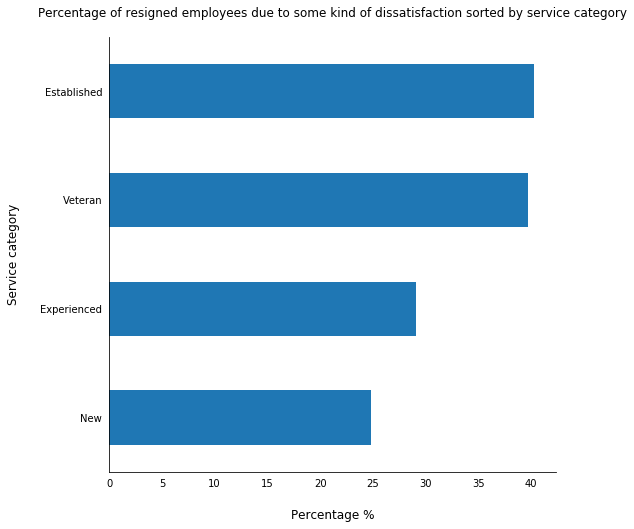

In [41]:
# grouping data by 'institute_service'
grouped_inst = combined.pivot_table(index='institute_service',values='dissatisfied').sort_values('dissatisfied')
# ploting grouped_inst
plt.figure(figsize=(8,8))
ax1=plt.gca()
round(grouped_inst.dissatisfied*100,2).plot(kind='barh',legend=False,ax=ax1)
ax1.set_ylabel(None)
ax1.set_xlabel('Percentage %',labelpad=20,size=12)
ax1.set_ylabel('Service category',labelpad=20,size=12)
ax1.set_title('Percentage of resigned employees due to some kind of dissatisfaction sorted by service category',pad=20,size=12)
ax1.tick_params(right=False,top=False,left=False,bottom=False)
for key,spine in ax1.spines.items():
    if key in['top','right']:
        spine.set_visible(False)



- About 25% of employees who worked for the institutes for a short period of time resigned due to some dissatisfaction.
- About 40% of employees who worked for the institutes for a long period of time resigned due to some dissatisfaction.


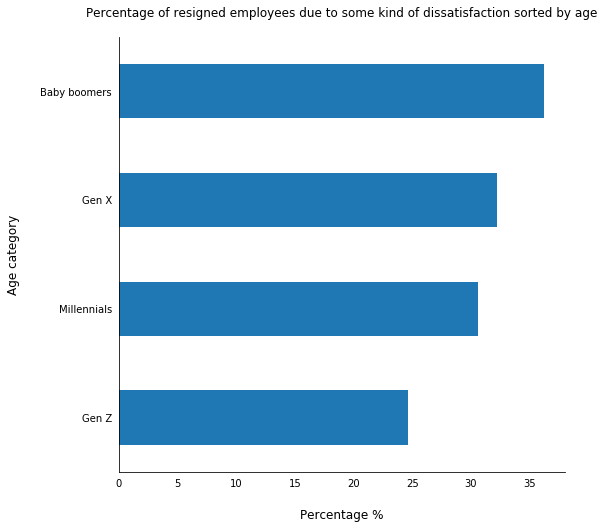

In [42]:
# grouping data by 'age'
grouped_age = combined.pivot_table(index='age',values='dissatisfied').sort_values('dissatisfied')
# ploting grouped_inst
plt.figure(figsize=(8,8))
ax1=plt.gca()
round(grouped_age.dissatisfied*100,2).plot(kind='barh',legend=False,ax=ax1)
ax1.set_ylabel(None)
ax1.set_xlabel('Percentage %',labelpad=20,size=12)
ax1.set_ylabel('Age category',labelpad=20,size=12)
ax1.set_title('Percentage of resigned employees due to some kind of dissatisfaction sorted by age',pad=20,size=12)
ax1.tick_params(right=False,top=False,left=False,bottom=False)
for key,spine in ax1.spines.items():
    if key in['top','right']:
        spine.set_visible(False)

- About 36% of employees aged 55 and higher resigned due to some dissatisfaction.
- About 25% of young employees resigned due to some dissatisaction.

## dete_survey Data Analysis
* Regarding the `'dete_survey'` database, what type of separation is most signed by employees for leaving the institute ?

In [43]:
dete_survey.separationtype.unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

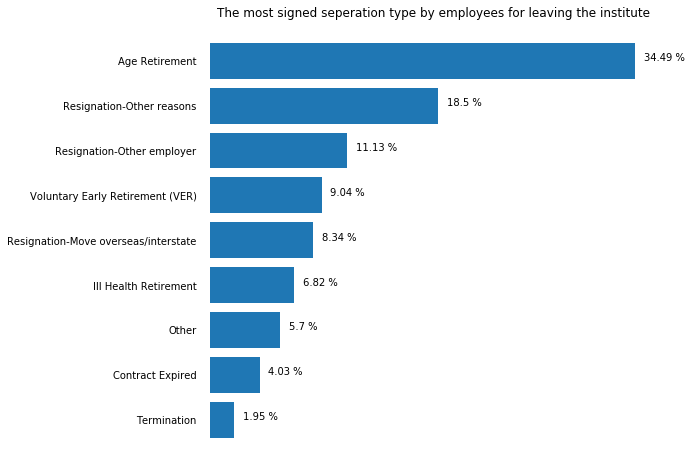

In [44]:
# grouping data by seperationtype
seperationtype = dete_survey.groupby('separationtype').count().sort_values('id')
# plotting seperationtype
fig,ax1=plt.subplots(figsize=(8,8))
ax1.barh(seperationtype.index,seperationtype.iloc[:,0])
ax1.set_xticks([])
for key,spine in ax1.spines.items():
    spine.set_visible(False)
    
ax1.set_title('The most signed seperation type by employees for leaving the institute',size=12)
# Remove y Ticks
ax1.yaxis.set_ticks_position('none')
ax1.xaxis.set_ticks_position('none')
# Add padding between axes and labels
ax1.xaxis.set_tick_params(pad=5)
ax1.yaxis.set_tick_params(pad=10)
# annotation
for i in ax1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_width()+5, i.get_y()+i.get_height()/2,\
             str(round(i.get_width()*100/seperationtype.iloc[:,0].sum(), 2))+' %', fontsize=10)

* `Age Retirement` is the most signed seperation type by employees for leaving the institute.
* `Resignation-other reasons` comes second with 18.5%. 


###     *  For what reason do the employee resign and leave the institute?


In [45]:
reasons = ['career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above']
resignation = dete_survey.loc[dete_survey['separationtype'] == 'Resignation-Other reasons',:]
# putting reasons into one unique column
melted = pd.melt(resignation, value_vars=reasons,var_name='reasons')
# grouping by reasons
resignation_reasons = melted.pivot_table(index='reasons',values='value').sort_values('value')

  ### * Ploting result

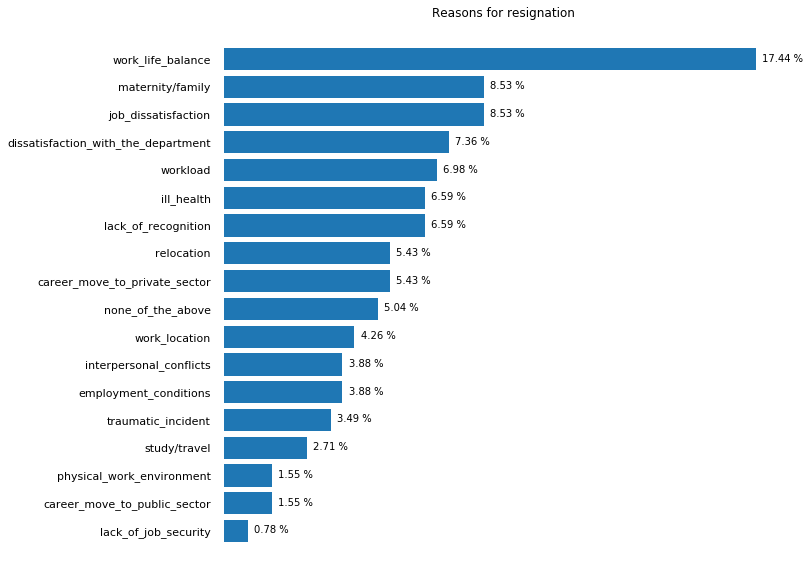

In [46]:
# plotting reason
fig,ax1=plt.subplots(figsize=(10,10))
ax1.barh(resignation_reasons.index,resignation_reasons.iloc[:,0])
ax1.set_xticks([])
for key,spine in ax1.spines.items():
    spine.set_visible(False)
    
ax1.set_title('Reasons for resignation',size=12)
# Remove y Ticks
ax1.yaxis.set_ticks_position('none')
ax1.xaxis.set_ticks_position('none')

# Add padding between axes and labels
ax1.xaxis.set_tick_params(pad=5)
ax1.yaxis.set_tick_params(pad=10,labelsize=11)
# annotation
for i in ax1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_width()+.004, i.get_y()+i.get_height()/2 -.09,\
             str(round(i.get_width()*100/resignation_reasons.iloc[:,0].sum(), 2))+' %', fontsize=10)

* `Work life balance` is the most common reason for resignation by employees.

## Conclusion

In this project we have worked with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia in order to answer the following questions:

   * Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
 
   * Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We have found that younger employees with fewer years of experience are less likely to resign due to some sort of dissatisfaction than older employees with long years of experience.

Regarding the exit surveys of employees of the Ministry of Education, Training and Employment (DETE), employees who could not find the right work-life balance are more likely to resign at some point.